In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [2]:
main_data_dir = 'D:/Projects/HerbScan/Dataset/Segmented Medicinal Leaf Images'
batch_size = 32
num_classes = len(os.listdir(main_data_dir))
epochs = 10

In [3]:
# Create label mapping based on subdirectory names
label_mapping = {i: label for i, label in enumerate(sorted(os.listdir(main_data_dir)))}

In [4]:
label_mapping

{0: 'Alpinia Galanga (Rasna)',
 1: 'Amaranthus Viridis (Arive-Dantu)',
 2: 'Artocarpus Heterophyllus (Jackfruit)',
 3: 'Azadirachta Indica (Neem)',
 4: 'Basella Alba (Basale)',
 5: 'Brassica Juncea (Indian Mustard)',
 6: 'Carissa Carandas (Karanda)',
 7: 'Citrus Limon (Lemon)',
 8: 'Ficus Auriculata (Roxburgh fig)',
 9: 'Ficus Religiosa (Peepal Tree)',
 10: 'Hibiscus Rosa-sinensis',
 11: 'Jasminum (Jasmine)',
 12: 'Mangifera Indica (Mango)',
 13: 'Mentha (Mint)',
 14: 'Moringa Oleifera (Drumstick)',
 15: 'Muntingia Calabura (Jamaica Cherry-Gasagase)',
 16: 'Murraya Koenigii (Curry)',
 17: 'Nerium Oleander (Oleander)',
 18: 'Nyctanthes Arbor-tristis (Parijata)',
 19: 'Ocimum Tenuiflorum (Tulsi)',
 20: 'Piper Betle (Betel)',
 21: 'Plectranthus Amboinicus (Mexican Mint)',
 22: 'Pongamia Pinnata (Indian Beech)',
 23: 'Psidium Guajava (Guava)',
 24: 'Punica Granatum (Pomegranate)',
 25: 'Santalum Album (Sandalwood)',
 26: 'Syzygium Cumini (Jamun)',
 27: 'Syzygium Jambos (Rose Apple)',
 28: 

In [5]:
image_path = 'D:/Projects/HerbScan/Dataset/Input/minttest/M-S-028.jpg'

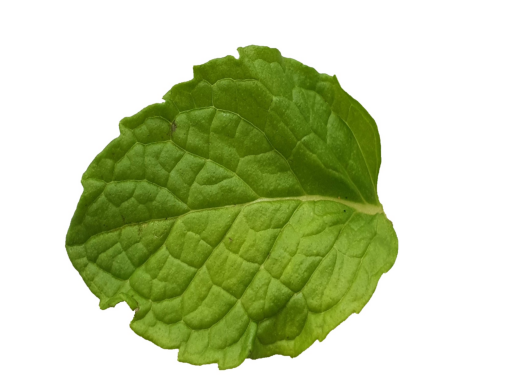

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Load the trained model
model = tf.keras.models.load_model('plant_identification_model.h5')

# Load and preprocess the image
def preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    preprocessed_image = preprocess_input(image_array)
    return preprocessed_image

# Perform prediction
def predict_plant(image_path, label_mapping):
    preprocessed_image = preprocess_image(image_path)
    predictions = model.predict(preprocessed_image)
    
    # Map model's numeric predictions to labels
    predicted_label_index = np.argmax(predictions)
    predicted_label = label_mapping[predicted_label_index]
    confidence = predictions[0][predicted_label_index]
    
    return predicted_label, confidence

# Provide the path to the image you want to classify
predicted_label, confidence = predict_plant(image_path, label_mapping)

# Print the prediction
print(f"Predicted Label: {predicted_label}")
print(f"Confidence: {confidence:.2f}")

1/1 [==============================] - 2s 2s/step
Predicted Label: Mentha (Mint)
Confidence: 1.00
